# Smooth Dynamic Morphing

In this notebook I will show how to do smooth dynamic morphing using 2 orthogonal bases on coupling coefficients for VBF data.

The morphing algorithm works as follows:
 1. Select randomly **ncomb** samples from all samples
 2. Obtain all permutations of **nsamples** size from the **ncomb** samples
 3. Sort the obtained permutations by evaluating **n_eff/n_tot** ratio on a representative point of the fitting space (the central point is fine) and retain a X%(using 50%) of the best permutations.
 4. For each permutation choose randomly **n_2** bases as a possible second base using the rest of the samples, (base_1,base_2_1),(base_1,base_2_2),...,(base_1,base_2_n_2),(base_2,base_2_1),...(base_n_1,base_2_n_2).
 5. At this point depending in the amount of pairs obtained I throw away randomly a X% of the pairs.
 6. Select the best pair of bases evaluating each pair as $\sum_{(c1,c2)\in C1XC2} (n\_eff\_1(c1,c2) + n\_eff\_2(c1,c2))/2$ where $n\_eff\_i(c1,c2)$ are the values of the **n_eff** ratio for the base i and evaluated in the point c1,c2 of the parameter space. Depending on the number of pairs, another option is to stop the search as soon as a defined value is reached. Also, if any of the points evaluated in the previous sum have a **condition number** too small then both bases are rejected.
 
Something to notice is that in python (itertools) the permutations are evaluated in a lazy way, so when I say 'Obtain all the permutations' they are not really computed (put in memory).

I will show how to use the class implemented to do the **smooth morphing**, this code makes use of the EFT Morphing code. A python Wrapper for this code have been implemented.

In [235]:

import numpy as np
import pdb 
from pyMorphWrapper import MorphingWrapper

In [236]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We start by defining some constants:
- The fitting range
- The number of points in the coupling space to be used in the fit
- The available samples

In [256]:
# Define fitting ranges
g1_range = (-0.3557,0.2646)
g2_range = (-0.34467,0.34467)

# Intervals for each axis
npoints = 15

csarray1 = np.linspace(g1_range[0],g1_range[1],npoints)
csarray2 = np.linspace(g2_range[0], g2_range[1], npoints)


# nsamples, ncomb
nsamples = 15
ncomb = 18
# List of availables basis samples
#available_samples = [[1.0, 1.0, 0.5], [1.0, 0.0, -1.0], [1.0, 0.0, -0.5], [1.0, 1.0, 0.0], [1.0, 1.0, 1.0], 
#                     [1.0, 1.0, -0.5], [1.0, 0.5, 0.3333333333333333], [1.0, 0.3333333333333333, 0.2], 
#                     [1.0, 0.3333333333333333, 0.14285714285714285], [1.0, 0.25, 0.16666666666666666], 
#                     [1.0, 2.0, 0.0], [1.0, 2.0, 1.0], [1.0, 2.0, 2.0], [1.0, 2.0, -1.0], [1.0, -1.0, 0.0],
#                     [1.0, -1.0, 0.5], [1.0, -1.0, -0.5], [1.0, -0.5, -0.3333333333333333], 
#                     [1.0, -0.3333333333333333, -0.2], [1.0, -0.3333333333333333, -0.14285714285714285], 
#                     [1.0, -0.25, -0.16666666666666666], [1.0, -2.0, 0.0], [1.0, -2.0, 1.0], [1.0, -2.0, -1.0], 
#                     [1.0, -2.0, -2.0], [1.0, -1.5, -1.5]]
#print available_samples
available_samples = [[1.0,cs1,cs2] for cs1 in np.linspace(-0.5,0.5,8) for cs2 in np.linspace(-0.5,0.5,8)]


Now we use the morphing class and set the data used in the morphing.

In [270]:
from pyMorphWrapper import MorphingWrapper
# Compute both bases
np.random.seed(1234)
morph = MorphingWrapper()
# Define number of samples, number of couplings, types (S,P,D) and available samples
# Using half of range as initial target (used only to make computation faster)
target = [1.,1.,1.]
morph.setSampleData(nsamples=nsamples,ncouplings=3,types=['S','S','S'],samples=available_samples,
      ncomb=ncomb)

indexes = morph.evolMorphing(cvalues_1 = csarray1,cvalues_2 = csarray2)

# Obtain the bases by using smooth dynamic morphing

0.0772801637583
0.20432241178
0.297004838109
0.1860111262
0.453748700618
0.300536923196
0.346749545799
0.141768382824
0.167336148755
0.237165617562
0.190125511669
0.25951599838
0.322370377673
0.393178111686
0.200418128498
0.242564729955
0.288281854542
0.328407572957
0.214156614524
0.285944271984
0.3564205517
0.298766635589
0.353116213869
0.140833838688
0.367096412385
0.2296046326
0.328526168695
0.281882356508
0.377875241134
0.342466977112
0.179420606324
0.2708099849
0.284962880547
0.22632866442
0.227007122548
0.162590733859
0.395575993081
0.26480834772
0.267981762473
0.360537288909
0.163417106358
0.418881180784
gen	nevals
0  	50    
0.254348260526
0.198830314258
0.289145569081
0.211848368705
0.420249021244
0.32843428369
0.249704522836
0.398029298921
0.277318763208
0.240035715028
0.271654060181
0.203628201218
0.238470594922
0.208111586926
0.360595748408
0.347957601014
0.141585296416
0.427292776493
0.348315127106
0.349266230615
0.396771683358
0.348362135049
0.248074211847
0.312197698603


In [241]:
# Obtain the bases by using smooth dynamic morphing
#indexes = morph.dynamicMorphing(cvalues_1 = csarray1,cvalues_2 = csarray2)

121
Starting combinations
Start sorting
Elapsed time combinations: 0.486103057861
Number of combinations: 81
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Number of pairs: 583
0.308045861251
0.309118932241
0.363552985501
0.390992200427
0.316241691713
0.418128077247
0.444799347455
0.360871901875
0.464164389504
0.319847101523
0.378476907857
0.315566057917
0.348747051171
0.312478243244
0.4884836836
0.31187929842
0.34096888902
0.406664932692
0.363596698804
0.377773540518
0.421925956779
0.411526591396
0.373470265526
0.315890444115
0.494803028903
0.284563260964
0.403832680854
0.365226571362
0.382516730422
0.289512932193
0.452410987874
0.336801855507
0.41972987593
0.421231757321
0.47658192725
0.330200179979
0.358154432247
0.44478465961
0.422091315534
0.322784164396
0.414030568327
0.339691768596
0.37611793484
0.41240663373
0.348100735241
0.335475487743
0.552342055205
0.242853987

In [271]:
print indexes
#[[5, 7, 8, 11, 17, 21, 24, 27, 30, 34, 37, 43, 47, 58, 60], [6, 14, 19, 25, 26, 28, 29, 33, 36, 38, 54, 55, 56, 59, 62]]
# best so far ev 0.70, 8

[[5, 7, 8, 11, 17, 21, 24, 27, 30, 34, 37, 43, 47, 58, 60], [6, 14, 19, 25, 26, 28, 29, 33, 36, 38, 54, 55, 56, 59, 62]]


Next we obtain the cross sections and weights for each one of the orthogonal bases and for each point on the parameter space.

In [272]:
# Save cross sections and couplings for each one of the points on the fitting space
# Also compute the weighted n_eff
for l,ind in enumerate(indexes): 
  ind = np.array(ind)
  morph.resetBasis([available_samples[int(k)] for k in ind]) 
  sorted_indexes = np.argsort(ind)
  indexes[l] = ind[sorted_indexes]
  for i,cs in enumerate(csarray1):
    for j,cs2 in enumerate(csarray2):
      target[1] = cs
      target[2] = cs2 
      morph.resetTarget(target)
        # Compute weights and cross section of each sample
      couplings = np.array(morph.getWeights())
      cross_section = np.array(morph.getCrossSections())
      couplings,cross_section = (couplings[sorted_indexes],
                        cross_section[sorted_indexes])
      # Save list of cross sections and weights for each samples and orthogonal bases
      all_couplings = np.vstack([all_couplings,couplings])  if i <> 0 or j <> 0 or l <> 0 else couplings
      all_cross_sections = np.vstack([all_cross_sections, cross_section]) if i <> 0 or j <> 0 or l <> 0 else cross_section

Finally, we compute the weighted n_eff for each point in the parameter space

In [273]:
# Now compute and plot the weighted n_eff in order to evaluate the models
alpha = np.zeros([csarray1.shape[0],csarray2.shape[0],2])
n_eff_ratio = np.zeros((csarray1.shape[0], csarray2.shape[0]))
for i,cs in enumerate(csarray1):
  for j, cs2 in enumerate(csarray2):
    target[1] = cs
    target[2] = cs2
    print '{0} {1}'.format(i,j)
    print target

    c1s_1 = all_couplings[i*npoints + j]
    cross_section_1 = all_cross_sections[i*npoints + j]
    c1s_1 = np.multiply(c1s_1,cross_section_1)
    n_eff = c1s_1.sum()
    n_tot = np.abs(c1s_1).sum()
    n_eff_1 = n_eff / n_tot

    c1s_2 = all_couplings[npoints*npoints + i*npoints + j]
    cross_section_2 = all_cross_sections[npoints*npoints + i*npoints + j]
    c1s_2 = np.multiply(c1s_2,cross_section_2)
    n_eff = c1s_2.sum()
    n_tot = np.abs(c1s_2).sum()
    n_eff_2 = n_eff / n_tot

    # Compute weights for bases
    neff2 = 1./n_eff_2
    neff1 = 1./n_eff_1
    alpha1 = np.exp(-np.sqrt(neff1))
    alpha2 = np.exp(-np.sqrt(neff2))
    alpha[i,j,0] = alpha1/(alpha1 + alpha2)
    alpha[i,j,1] = alpha2/(alpha1 + alpha2)

    # Compute Bkg weights
    n_eff_ratio[i,j] = (alpha[i,j,0]*n_eff_1 + alpha[i,j,1]*n_eff_2)

    print 'Weighted eff for ({0},{1}): {2}'.format(cs,cs2,n_eff_ratio[i,j])

0 0
[1.0, -0.35570000000000002, -0.34466999999999998]
Weighted eff for (-0.3557,-0.34467): 0.21780169229
0 1
[1.0, -0.35570000000000002, -0.29543142857142857]
Weighted eff for (-0.3557,-0.295431428571): 0.205341189391
0 2
[1.0, -0.35570000000000002, -0.24619285714285713]
Weighted eff for (-0.3557,-0.246192857143): 0.213422748448
0 3
[1.0, -0.35570000000000002, -0.19695428571428569]
Weighted eff for (-0.3557,-0.196954285714): 0.246609495564
0 4
[1.0, -0.35570000000000002, -0.14771571428571428]
Weighted eff for (-0.3557,-0.147715714286): 0.328878738668
0 5
[1.0, -0.35570000000000002, -0.098477142857142874]
Weighted eff for (-0.3557,-0.0984771428571): 0.569792817638
0 6
[1.0, -0.35570000000000002, -0.049238571428571409]
Weighted eff for (-0.3557,-0.0492385714286): 0.622068732029
0 7
[1.0, -0.35570000000000002, 0.0]
Weighted eff for (-0.3557,0.0): 0.375396164055
0 8
[1.0, -0.35570000000000002, 0.049238571428571409]
Weighted eff for (-0.3557,0.0492385714286): 0.296186716574
0 9
[1.0, -0.355

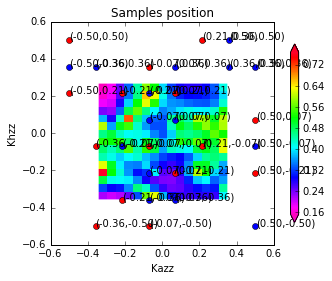

In [274]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig,ax = plt.subplots()
    
A = [available_samples[ind][1] for ind in indexes[0]]
B = [available_samples[ind][2] for ind in indexes[0]]
A2 = [available_samples[ind][1] for ind in indexes[1]]
B2 = [available_samples[ind][2] for ind in indexes[1]]

ax.set_title('Samples position')
ax.set_xlabel('Kazz')
ax.set_ylabel('Khzz')    
    
vals = np.flipud(n_eff_ratio)
im = plt.imshow(vals, extent=(csarray2.min(), csarray2.max(), csarray1.min(),csarray1.max()),interpolation='nearest', cmap=cm.gist_rainbow_r)
CB = plt.colorbar(im, shrink=0.8, extend='both')

plt.plot(A,B,'ro')
plt.plot(A2,B2,'bo')
for xy in zip(A, B):                                               
    ax.annotate('({0:.2f},{1:.2f})'.format(xy[0],xy[1]), xy=xy, textcoords='offset points') 
for xy in zip(A2, B2):                                               
    ax.annotate('({0:.2f},{1:.2f})'.format(xy[0],xy[1]), xy=xy, textcoords='offset points') 

plt.savefig('morph/evmorph_khzz_kazz_11_05_05.png')